# 16-2. 이상 데이터 분석 및 처리

In [1]:
# 라이브러리 불러오기 
import pandas as pd 

# 데이터 불러오기
user_data = pd.read_csv("/Users/kenny_jung/aiffel/data/user_data.csv")

# 데이터의 상위 5번째 행까지 출력
user_data.head()

,CustomerID,purchase_cnt,item_cnt,recency,user_total,user_average,unique_products,average_interval,total_transactions,cancel_frequency,cancel_ratio
0,16270,1,688,353,1141.0,1141.0,54,0.0,54,0,0.0
1,16022,1,255,260,603.0,603.0,68,0.0,71,0,0.0
2,15464,1,348,338,1045.0,1045.0,155,0.0,155,0,0.0
3,13428,1,151,10,202.0,202.0,70,0.0,71,0,0.0
4,12965,1,282,89,770.0,770.0,108,0.0,108,0,0.0


In [2]:
from scipy import stats
import numpy as np

In [3]:
# Z-score 계산 
z_scores = stats.zscore(user_data.iloc[:, 1:], axis=0)  

# Z-score 절대값 계산
z_scores = np.abs(z_scores)

# Z-score 출력
z_scores

,purchase_cnt,item_cnt,recency,user_total,user_average,unique_products,average_interval,total_transactions,cancel_frequency,cancel_ratio
0,0.439709,0.091971,2.588043,0.091180,2.097056,0.083991,0.295648,0.164730,0.271913,0.296537
1,0.439709,0.184719,1.666898,0.156273,0.721569,0.080026,0.295648,0.090257,0.271913,0.296537
2,0.439709,0.164799,2.439471,0.102795,1.851616,1.099276,0.295648,0.277726,0.271913,0.296537
3,0.439709,0.206996,0.809297,0.204791,0.303654,0.103457,0.295648,0.090257,0.271913,0.296537
4,0.439709,0.178936,0.026819,0.136068,1.148533,0.548647,0.295648,0.071831,0.271913,0.296537
...,...,...,...,...,...,...,...,...,...,...
4357,0.661393,0.018287,0.868726,0.023156,0.335264,0.314337,0.051979,0.159446,0.132456,0.217527
4358,0.771503,0.188200,0.700344,0.238882,0.004211,0.314337,0.103185,0.295249,1.122661,0.340610
4359,0.991724,0.022785,0.680535,0.075182,0.360631,0.314337,0.040502,0.049927,0.146459,0.001768
4360,2.423156,0.175991,0.888535,0.303613,0.403080,0.314337,0.155274,0.579998,1.541034,0.290976


In [4]:
# 임계값(threshold) 설정
threshold = 3

# z-score 기준으로 이상치를 찾아서 outlier 컬럼에 이상치 여부 기입 (0: 정상, 1:이상치)
user_data['outlier'] = (z_scores > threshold).any(axis=1).astype(int)
user_data.head()

,CustomerID,purchase_cnt,item_cnt,recency,user_total,user_average,unique_products,average_interval,total_transactions,cancel_frequency,cancel_ratio,outlier
0,16270,1,688,353,1141.0,1141.0,54,0.0,54,0,0.0,0
1,16022,1,255,260,603.0,603.0,68,0.0,71,0,0.0,0
2,15464,1,348,338,1045.0,1045.0,155,0.0,155,0,0.0,0
3,13428,1,151,10,202.0,202.0,70,0.0,71,0,0.0,0
4,12965,1,282,89,770.0,770.0,108,0.0,108,0,0.0,0


/var/folders/b9/d_8nll_s47g6w2x0spndwwl80000gn/T/ipykernel_37116/3747334697.py:6: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  outlier_percentage = pd.value_counts(user_data['outlier'], normalize=True) * 100


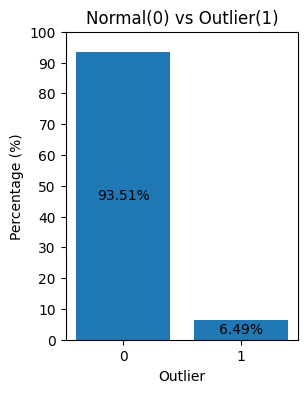

In [5]:
# 시각화에 필요한 라이브러리 불러오기
import matplotlib.pyplot as plt 

# user_data['outlier']을 활용하여 이상치 여부에 따른 확률 계산
# value_counts()는 열의 고윳값의 개수를 반환하지만 normalize=True를 사용하면 열에 있는 값의 개수 비율(상대적 빈도)을 반환함
outlier_percentage = pd.value_counts(user_data['outlier'], normalize=True) * 100

# 시각화 자료 크기 조정
plt.figure(figsize=(3, 4))

# outlier_percentage라는 데이터로 bar chart 시각화
# x축 값을 0과 1로 지정
bars = plt.bar(['0', '1'], outlier_percentage)

# 퍼센트(%) 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval/2, f'{yval:.2f}%', fontsize=10, va='center', ha='center')

plt.title('Normal(0) vs Outlier(1)') # 표 제목
plt.yticks(ticks=np.arange(0, 101, 10)) # y축 표기 (0~100까지 10단위로 증가)
plt.ylabel('Percentage (%)') # y축 범례
plt.xlabel('Outlier') # x축 범례
plt.show() # 출력

In [6]:
# 정상 데이터만 필터링 
user_data = user_data[user_data['outlier'] == 0] 

# outlier 컬럼 삭제 
user_data = user_data.drop(columns=['outlier'])

# DataFrame의 인덱스를 리셋하고, 이전 인덱스를 컬럼으로 추가하지 않음
user_data.reset_index(inplace=True, drop=True)
user_data.head()

,CustomerID,purchase_cnt,item_cnt,recency,user_total,user_average,unique_products,average_interval,total_transactions,cancel_frequency,cancel_ratio
0,16270,1,688,353,1141.0,1141.0,54,0.0,54,0,0.0
1,16022,1,255,260,603.0,603.0,68,0.0,71,0,0.0
2,15464,1,348,338,1045.0,1045.0,155,0.0,155,0,0.0
3,13428,1,151,10,202.0,202.0,70,0.0,71,0,0.0
4,12965,1,282,89,770.0,770.0,108,0.0,108,0,0.0


# 16-3. 변수 간 상관관계 분석

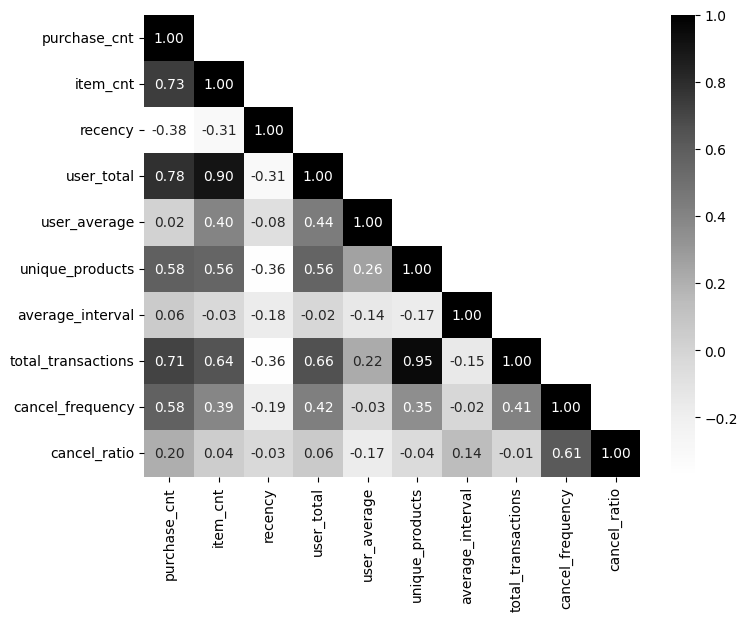

In [7]:
# 시각화 라이브러리 불러오기
import seaborn as sns  

# 'CustomerID' 열을 제외(drop)하고 상관 관계 행렬 계산(corr())
corr = user_data.drop(columns=['CustomerID']).corr()

# 행렬이 대각선을 기준으로 대칭이기 때문에 하단만 표시하기 위한 마스크 생성
mask = np.zeros_like(corr) # np.zeros_like()는 0으로 가득찬 array 생성, 크기는 corr와 동일   
mask[np.triu_indices_from(mask, k=1)] = True # array의 대각선 영역과 그 윗 부분에 True가 들어가도록 설정

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(corr, mask=mask, cmap='Greys', annot=True, fmt='.2f')
plt.show()

# 16-4. 피처(feature) 스케일링

In [8]:
# Standard Scaler 불러오기 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [9]:
# 원본 데이터에 영향을 주지 않기 위해 복사 
data = user_data.copy()

# CustomerID를 제외한 데이터에 스케일링 적용
columns_list = data.iloc[:, 1:].columns # iloc: 데이터 특정 값 추출, columns: 데이터프레임의 열 이름 조회 
data[columns_list] = scaler.fit_transform(data[columns_list])

In [10]:
# 스케일링 된 데이터 출력
data.head()

,CustomerID,purchase_cnt,item_cnt,recency,user_total,user_average,unique_products,average_interval,total_transactions,cancel_frequency,cancel_ratio
0,16270,-0.703553,-0.038341,2.606326,-0.043192,4.050604,-0.011482,-0.57862,-0.214723,-0.43093,-0.441764
1,16022,-0.703553,-0.446419,1.676124,-0.350441,1.483738,0.239251,-0.57862,-0.022036,-0.43093,-0.441764
2,15464,-0.703553,-0.358772,2.456293,-0.098017,3.592576,1.797378,-0.57862,0.930069,-0.43093,-0.441764
3,13428,-0.703553,-0.544433,-0.824421,-0.579449,-0.429484,0.275070,-0.57862,-0.022036,-0.43093,-0.441764
4,12965,-0.703553,-0.420973,-0.034249,-0.255068,2.280516,0.955631,-0.57862,0.397344,-0.43093,-0.441764


# 16-5. 차원축소

In [11]:
# PCA 불러오기  
from sklearn.decomposition import PCA

# CustomerID를 인덱스로 지정  
data.set_index('CustomerID', inplace=True)

# PCA 적용
pca = PCA().fit(data)

In [12]:
# Explained Variance의 누적합 계산  
explained_variance_ratio = pca.explained_variance_ratio_ # explained_variance_ratio_: Explained Variance 비율을 계산해 주는 함수
cumulative_explained_variance = np.cumsum(explained_variance_ratio) # cumsum: 각 원소의 누적합을 계산하는 함수

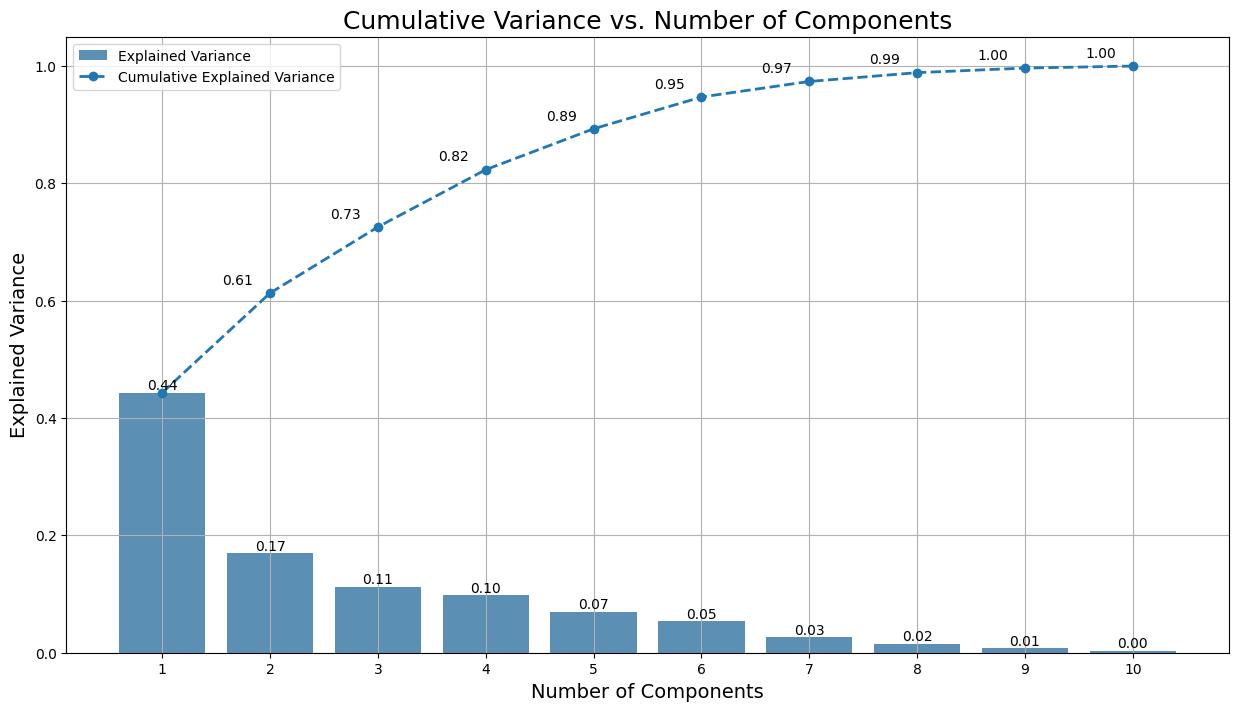

In [13]:
plt.figure(figsize=(15, 8)) 

# 각 성분의 설명된 분포에 대한 막대 그래프
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)), y=explained_variance_ratio, alpha=0.8)

# 누적 분포에 대한 선 그래프
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance, marker='o', linestyle='--', linewidth=2)

# 레이블과 제목 설정
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

# 눈금 및 범례 사용자 정의
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot],
           labels=['Explained Variance', 'Cumulative Explained Variance'])  

# 두 그래프의 분산 값 표시
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')   
plt.show()

In [14]:
# 6개의 주성분을 유지하는 PCA 선언 
pca = PCA(n_components=6)

# 기존 data를 pca에 fit_transform
data_pca = pca.fit_transform(data)

# 압축된 데이터 셋 생성
data_pca = pd.DataFrame(data_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

# 인덱스로 빼 두었던 CustomerID 다시 추가
data_pca.index = data.index

In [15]:
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
CustomerID,,,,,,
16270,-0.488324,-2.636243,-1.760057,3.055311,-0.256970,-1.863569
16022,-0.810501,-1.481596,-1.242918,0.842642,0.083687,-1.158609
15464,0.493270,-2.827193,-1.903133,1.560133,-0.384388,-3.033841
13428,-0.682887,-0.498307,0.140807,-1.112666,-0.798685,0.254432
12965,0.198376,-1.905299,-0.436049,0.522328,-1.429695,-1.157828


# 16-6. K-Means 클러스터링

In [16]:
from sklearn.cluster import KMeans
from collections import Counter

# k=3개의 클러스터로 K-Means 클러스터링 적용
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(data_pca)

# 각 클러스터의 빈도수 구하기
cluster_frequencies = Counter(kmeans.labels_) 

# 빈도수에 기반하여 이전 레이블에서 새 레이블로의 매핑 생성
label_mapping = {label: new_label for new_label, (label, _) in 
                 enumerate(cluster_frequencies.most_common())}

# 매핑을 적용하여 새 레이블 얻기
new_labels = np.array([label_mapping[label] for label in kmeans.labels_])

# 원래 데이터셋에 새 클러스터 레이블 추가
user_data['cluster'] = new_labels

# PCA 버전의 데이터셋에 새 클러스터 레이블 추가
data_pca['cluster'] = new_labels

In [17]:
# K-Means 분류된 결과 보기
user_data.head()

,CustomerID,purchase_cnt,item_cnt,recency,user_total,user_average,unique_products,average_interval,total_transactions,cancel_frequency,cancel_ratio,cluster
0,16270,1,688,353,1141.0,1141.0,54,0.0,54,0,0.0,0
1,16022,1,255,260,603.0,603.0,68,0.0,71,0,0.0,0
2,15464,1,348,338,1045.0,1045.0,155,0.0,155,0,0.0,0
3,13428,1,151,10,202.0,202.0,70,0.0,71,0,0.0,0
4,12965,1,282,89,770.0,770.0,108,0.0,108,0,0.0,0


In [18]:
# 각 군집별로 몇 명의 고객이 있는지 확인
user_data.value_counts('cluster')

cluster
0    2916
1     626
2     537
Name: count, dtype: int64

# 16-7. 시각화 및 결과 분석

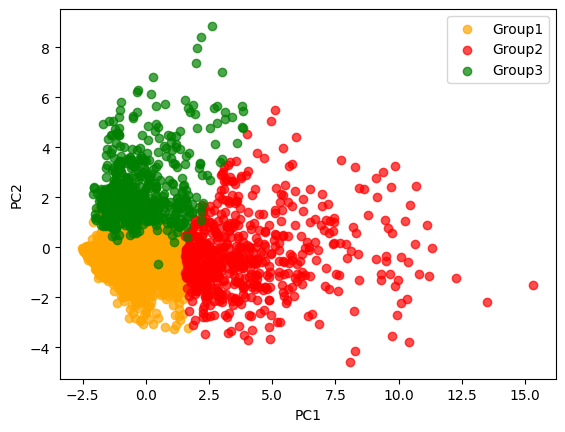

In [19]:
# 각 클러스터 별 데이터 분리 
cluster_0 = data_pca[data_pca['cluster'] == 0]
cluster_1 = data_pca[data_pca['cluster'] == 1]
cluster_2 = data_pca[data_pca['cluster'] == 2]


# 클러스터 별 시각화
plt.scatter(cluster_0['PC1'], cluster_0['PC2'], color = 'orange', alpha = 0.7, label = 'Group1')
plt.scatter(cluster_1['PC1'], cluster_1['PC2'], color = 'red', alpha = 0.7, label = 'Group2')
plt.scatter(cluster_2['PC1'], cluster_2['PC2'], color = 'green', alpha = 0.7, label = 'Group3')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [20]:
#pip install plotly==5.18.0

In [21]:
#pip install nbformat

In [22]:
# 색상 지정 
colors = ['red', 'blue', 'green']

# 각 클러스터별 데이터 분릴
cluster_0 = data_pca[data_pca['cluster'] == 0]
cluster_1 = data_pca[data_pca['cluster'] == 1]
cluster_2 = data_pca[data_pca['cluster'] == 2]

# 3D Scatter Plot 생성
import plotly.graph_objects as go
fig = go.Figure()

# 각 클러스터별 데이터 표기 
fig.add_trace(go.Scatter3d(x=cluster_0['PC1'], y=cluster_0['PC2'], z=cluster_0['PC3'], 
                           mode='markers', marker=dict(color=colors[0], size=5, opacity=0.4), name='Group 1'))
fig.add_trace(go.Scatter3d(x=cluster_1['PC1'], y=cluster_1['PC2'], z=cluster_1['PC3'], 
                           mode='markers', marker=dict(color=colors[1], size=5, opacity=0.4), name='Group 2'))
fig.add_trace(go.Scatter3d(x=cluster_2['PC1'], y=cluster_2['PC2'], z=cluster_2['PC3'], 
                           mode='markers', marker=dict(color=colors[2], size=5, opacity=0.4), name='Group 3'))

# 범례 및 제목 영역 설정
fig.update_layout(
    title=dict(text='3D Visualization of Customer Clusters in PCA Space', x=0.5),
    scene=dict(
        xaxis=dict(backgroundcolor="grey", gridcolor='white', title='PC1'),
        yaxis=dict(backgroundcolor="grey", gridcolor='white', title='PC2'),
        zaxis=dict(backgroundcolor="grey", gridcolor='white', title='PC3'),
    ),
    width=900,
    height=800
)

fig.show()

In [24]:
group1 = user_data[user_data['cluster'] == 0]
group2 = user_data[user_data['cluster'] == 1]
group3 = user_data[user_data['cluster'] == 2]

In [25]:
group1.describe()

,CustomerID,purchase_cnt,item_cnt,recency,user_total,user_average,unique_products,average_interval,total_transactions,cancel_frequency,cancel_ratio,cluster
count,2916.000000,2916.000000,2916.000000,2916.000000,2916.000000,2916.000000,2916.000000,2916.000000,2916.000000,2916.000000,2916.000000,2916.0
mean,15339.925583,2.442044,405.825789,109.170096,666.517833,286.798638,39.258230,1.753107,45.446845,0.227023,0.396783,0.0
std,1711.525581,1.881316,394.814752,104.846462,605.710350,195.993966,32.919156,2.572953,40.467376,0.629659,1.143629,0.0
min,12348.000000,1.000000,1.000000,0.000000,4.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0
25%,13849.750000,1.000000,129.000000,25.000000,232.750000,155.000000,14.000000,0.000000,15.000000,0.000000,0.000000,0.0
50%,15357.500000,2.000000,272.000000,65.000000,459.500000,236.166667,29.000000,0.385000,32.000000,0.000000,0.000000,0.0
75%,16805.250000,3.000000,546.000000,178.250000,905.250000,357.800000,56.000000,2.660000,65.000000,0.000000,0.000000,0.0
max,18287.000000,15.000000,2571.000000,373.000000,4392.000000,1488.000000,177.000000,13.620000,232.000000,5.000000,9.090000,0.0


In [26]:
group2.describe()

,CustomerID,purchase_cnt,item_cnt,recency,user_total,user_average,unique_products,average_interval,total_transactions,cancel_frequency,cancel_ratio,cluster
count,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.0
mean,15242.123003,11.353035,2453.079872,26.220447,4094.635783,413.907759,147.680511,1.555703,229.881789,3.793930,1.896565,1.0
std,1740.265092,6.218036,1709.031108,38.152192,2832.490748,260.861615,67.144288,1.308782,114.417154,4.514938,2.302820,0.0
min,12347.000000,2.000000,457.000000,0.000000,886.000000,80.208333,5.000000,0.000000,17.000000,0.000000,0.000000,1.0
25%,13806.750000,7.000000,1387.000000,4.000000,2382.000000,235.090909,101.000000,0.840000,148.000000,0.000000,0.000000,1.0
50%,15136.500000,10.000000,1947.000000,14.000000,3288.500000,341.208333,138.000000,1.295000,206.000000,2.000000,1.030000,1.0
75%,16781.250000,14.000000,3001.500000,32.000000,4850.250000,491.562500,192.000000,1.870000,290.750000,6.000000,2.882500,1.0
max,18283.000000,31.000000,14652.000000,315.000000,25186.000000,1482.333333,317.000000,15.560000,740.000000,23.000000,12.410000,1.0


In [27]:
group3.describe()

,CustomerID,purchase_cnt,item_cnt,recency,user_total,user_average,unique_products,average_interval,total_transactions,cancel_frequency,cancel_ratio,cluster
count,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.0
mean,15223.629423,4.787709,471.653631,78.666667,848.841713,178.262821,29.713222,8.241415,39.310987,3.536313,8.722142,2.0
std,1708.152005,2.882590,456.467049,88.049695,726.050196,124.843727,23.573711,8.711601,32.438491,3.950614,6.616944,0.0
min,12352.000000,2.000000,-303.000000,0.000000,-96.000000,-32.000000,1.000000,0.000000,2.000000,0.000000,0.000000,2.0
25%,13725.000000,3.000000,151.000000,15.000000,315.000000,103.333333,11.000000,2.100000,15.000000,1.000000,4.550000,2.0
50%,15267.000000,4.000000,321.000000,44.000000,634.000000,149.000000,22.000000,4.530000,28.000000,2.000000,7.810000,2.0
75%,16653.000000,6.000000,636.000000,113.000000,1165.000000,212.250000,42.000000,12.590000,55.000000,5.000000,12.240000,2.0
max,18282.000000,20.000000,2777.000000,366.000000,7092.000000,1144.000000,109.000000,36.500000,147.000000,23.000000,31.250000,2.0
